In [1]:
from IPython.display import Image

In [2]:
!python plot_gpr_noisy.py

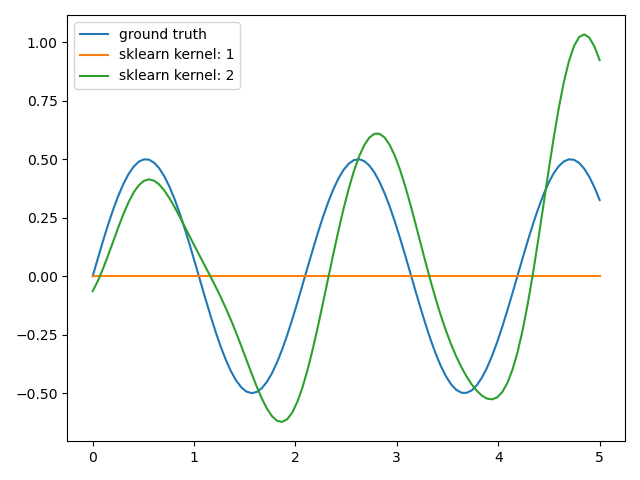

In [3]:
Image(filename='plots/sklearn_kernel.png') 

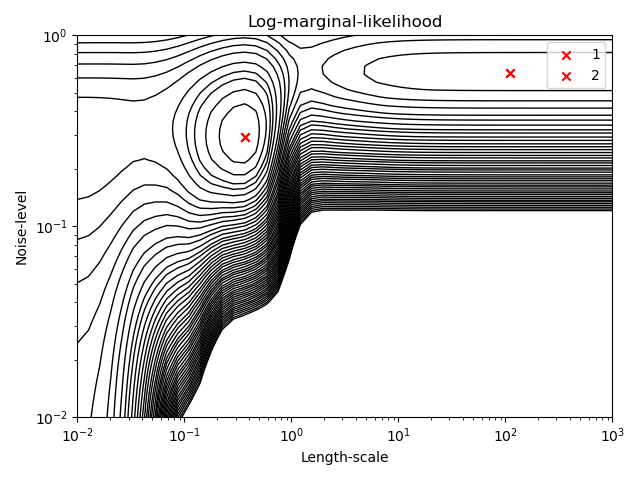

In [35]:
Image(filename='plots/sklearn_lml.png') 

In [19]:
import numpy as np

In [20]:
import matplotlib.pyplot as plt

In [21]:
LML = np.load('data/lml_arr.npy')

In [29]:
!time python sklearn_example.py

HGDL -----------------------------------------------------------
{'best_x': array([-0.89335616, -1.00663665, -1.22409482]), 'best_y': 21.805090890123722, 'minima_x': array([[ -0.89335616,  -1.00663665,  -1.22409482],
       [ -1.22153546,  -4.59622749,  -1.07179589],
       [ -2.03731924,  -4.31528667,  -0.67965554],
       [-11.51291934,  -3.92802254,  -0.45066178],
       [-10.73735833,  -4.60516905,  -0.45068007]]), 'minima_y': array([21.80509089, 23.86915829, 23.86915844, 23.87231062, 23.87231101]), 'global_x': array([[-3.35056094,  3.28577354,  0.34203853],
       [-6.31058413, -1.18605218, -1.31075509],
       [ 0.75625404, -4.41875032, -9.75814643],
       [-6.0575322 , -3.84813696,  0.85083665],
       [-6.82394713, -0.16789349, -1.41806989]]), 'global_y': array([26.4651014 , 28.69170975, 28.91471943, 29.61567423, 30.48313776])}
gp - HGDL ( 1 ):  GaussianProcessRegressor(alpha=0.0,
                         kernel=0.64**2 * RBF(length_scale=0.365) + WhiteKernel(noise_level=0.294

In [30]:
thetas = np.load('data/hgdl_thetas.npy')

In [31]:
thetas

array([[ -0.89335616,  -1.00663665,  -1.22409482],
       [ -1.22153546,  -4.59622749,  -1.07179589],
       [ -2.03731924,  -4.31528667,  -0.67965554],
       [-11.51291934,  -3.92802254,  -0.45066178],
       [-10.73735833,  -4.60516905,  -0.45068007]])

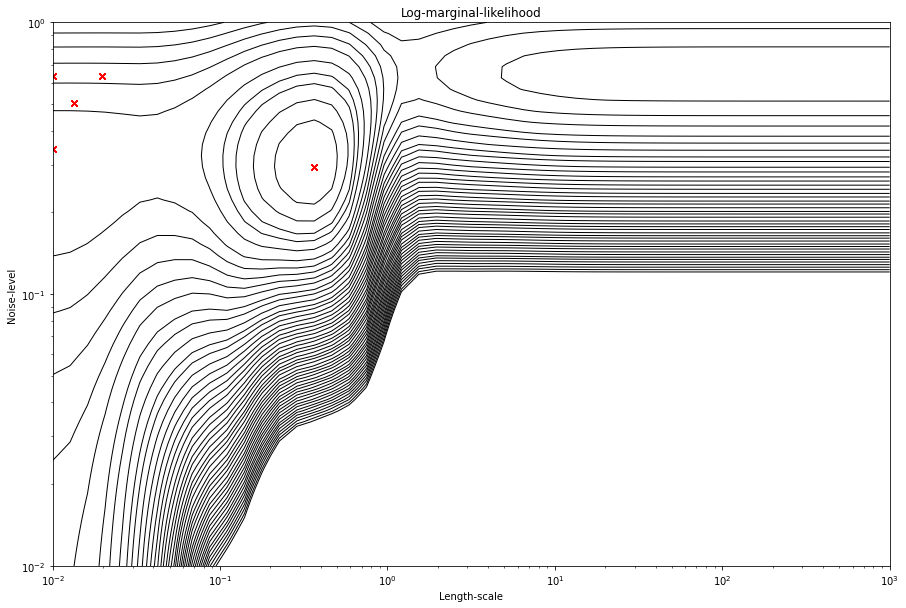

In [34]:
plt.figure(figsize=(15,10))

theta0 = np.logspace(-2, 3, 49)
theta1 = np.logspace(-2, 0, 50)
Theta0, Theta1 = np.meshgrid(theta0, theta1)
from matplotlib.colors import LogNorm

vmin, vmax = (-LML).min(), (-LML).max()
vmax = 50
level = np.around(np.logspace(np.log10(vmin), np.log10(vmax), 50), decimals=1)
plt.contour(Theta0, Theta1, -LML,
            #levels=level, norm=LogNorm(vmin=vmin, vmax=vmax))
            levels=level, colors='black', linewidths=1., norm=LogNorm(vmin=vmin, vmax=vmax))
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Length-scale")
plt.ylabel("Noise-level")
plt.title("Log-marginal-likelihood");
x, y = np.exp(thetas[:,1]), np.exp(thetas[:,2])
for i, (pt_x, pt_y) in enumerate(zip(x,y)):
    name = str(i+1)
    plt.scatter(x, y, c='red', marker='x', label=name)
    #print(x,y)